# VLE of glassy polymers

This is an example for a VLE calculation featuring an ASD and water (Figure 3 of https://doi.org/10.3390/pharmaceutics14061181). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,SAFTSAC,origin_like,NETVLE,D_Matrix
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

In [2]:
RHexp2 = np.asarray([9.24,29.39,44.49,59.9,73.44,87.81])
wwDL00=np.asarray([2.60172,7.96358,12.56039,17.41136,23.22512,33.00029])
wwDL02=np.asarray([2.01804,5.82007,9.00199,12.8181,17.31054,25.96267])
wwDL05=np.asarray([0.88812,2.45168,3.71775,5.45077,7.80249,12.48117])
wwDL10=np.asarray([0.08671,0.38691,0.70874,1.12984,1.63972,2.43159])

In [3]:
mi=np.asarray([1.20469,1045.99,14.2829768])
si=np.asarray([2.797059952,2.71,3.535])
ui=np.asarray([353.95,205.599,262.791])
eAi=np.asarray([2425.67,0.,886.44])
kAi=np.asarray([0.04509,0.02,0.02])
NAi=np.asarray([1.,231.,3.])
Mi=np.asarray([18.015,25700.,357.79])
kij=np.asarray([
    [0.,-0.128,-0.025],
    [-0.128,0.,-0],
    [-0.025,-0.,0.]])
kijA=D_Matrix(np.asarray([0.,0.,0.]),3)

In [4]:
T=298.15
p=1E5
npoint=30
v0p = np.asarray([1/1506.704837])
polymer=np.asarray([False,True,False])
mobile=np.asarray([True,False,False])
ksw=np.asarray([0.4279])
vpures=vpure(p,T,mi,si,ui,eAi,kAi,NAi)
ww=np.linspace(0.0001,0.4,npoint)

def calc_isotherm(DL):
    RHvecsaft=[]
    RHvecnet=[]
    for i,vali in enumerate(ww):
        wASD=(1-vali)
        wi=np.asarray([vali,wASD*(1-DL),wASD*DL])
        RHnet=NETVLE(T,wi,v0p,mobile,polymer,ksw,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)
        RHsaft=np.exp(lngi(T,wi,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)+np.log(wi))
        RHvecnet.append(RHnet[0])
        RHvecsaft.append(RHsaft[0])
    RHvecnet=np.asarray(RHvecnet)
    RHvecsaft=np.asarray(RHvecsaft)
    return RHvecnet,RHvecsaft

Text(0, 0.5, '$w_w$ / $10^{-2}$')

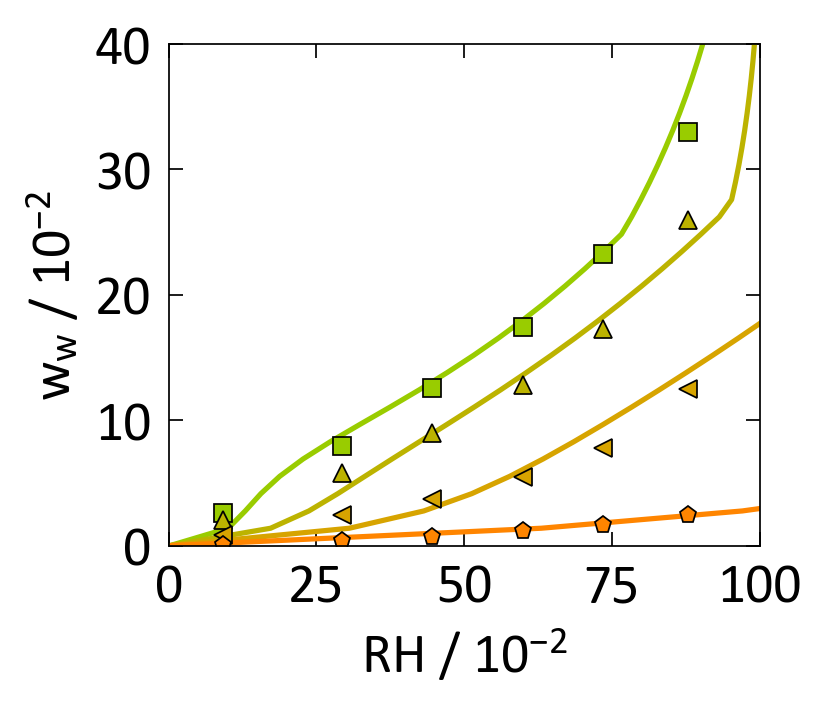

In [5]:
dlvec=np.asarray([0.,0.2,0.5,1.])
fmtvec=["g","y","m","r"]
fig,ax=origin_like.subplots()
for i,val in enumerate(dlvec):
    RHvecnet,RHvecsaft=calc_isotherm(val)
    if val==1.:
        RHvec=RHvecsaft.copy()
    else:
        RHvec=RHvecnet.copy() 
        RHvec[RHvec>RHvecsaft]=RHvecsaft[RHvec>RHvecsaft]
    origin_like.plot(ax,RHvec*100,ww*100,fmtvec[i]+'-')
origin_like.plot(ax,RHexp2,wwDL00,'gs')
origin_like.plot(ax,RHexp2,wwDL02,'y^')
origin_like.plot(ax,RHexp2,wwDL05,'m<')
origin_like.plot(ax,RHexp2,wwDL10,'rp')     
origin_like.set_ticks(ax,0,100,0,40)
ax.set_xlabel("RH / $10^{-2}$")
ax.set_ylabel("$w_w$ / $10^{-2}$")